In [16]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


# PCA - analiza skladowych glownych

zadanie: obliczenie srodka, osi glownych i kata obrotu z pliku csv

## Import

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("zaimportowano")

zaimportowano


## 1. Dane

wczytanie z 11.csv

In [18]:
# wczytanie danych
data = np.loadtxt('11.csv', delimiter=',')
n = data.shape[0]  # liczba wierszy
m = data.shape[1]  # liczba kolumn

print(f"wymiary: {n} wierszy, {m} kolumn")
print(f"pierwsze 5 wierszy:")
print(data[:5])

wymiary: 2 wierszy, 10000 kolumn
pierwsze 5 wierszy:
[[ 1.39287688 -0.58005554  1.60575732 ...  0.46647605  0.04609889
   0.58056555]
 [ 1.698413    1.22888296  1.74819054 ...  0.91327654  3.10608433
   1.54465064]]


## 2. Srednie

wzor: x̄_j = (1/n) * Σ X_ij

In [19]:
# obliczamy srednie w kolumnach
x_mean = np.mean(data, axis=0)

print(f"srodek danych (srednie):")
print(f"x̄ = {x_mean}")
print(f"\nx̄₁ = {x_mean[0]:.6f}")
print(f"x̄₂ = {x_mean[1]:.6f}")

srodek danych (srednie):
x̄ = [1.54564494 0.32441371 1.67697393 ... 0.68987629 1.57609161 1.0626081 ]

x̄₁ = 1.545645
x̄₂ = 0.324414


## 3. Centrowanie

odejmuje srednia: B = X - X̄

In [20]:
# odejmujemy srednia
B = data - x_mean

print("dane wycentrowane")
print(f"pierwsze 5:")
print(B[:5])
print(f"\nsprawdzenie - srednia po centrowaniu (powinno byc ~0):")
print(np.mean(B, axis=0))

dane wycentrowane
pierwsze 5:
[[-0.15276806 -0.90446925 -0.07121661 ... -0.22340024 -1.52999272
  -0.48204255]
 [ 0.15276806  0.90446925  0.07121661 ...  0.22340024  1.52999272
   0.48204255]]

sprawdzenie - srednia po centrowaniu (powinno byc ~0):
[ 1.11022302e-16  0.00000000e+00 -1.11022302e-16 ...  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


## 4. Kowariancja

C = (1/(n-1)) * B^T * B

In [21]:
# macierz kowariancji
C = (1 / (n - 1)) * B.T @ B

print("macierz kowariancji C:")
print(C)
print(f"\nC jest symetryczna: {np.allclose(C, C.T)}")

macierz kowariancji C:
[[0.04667616 0.27634803 0.02175925 ... 0.06825684 0.46746804 0.14728141]
 [0.27634803 1.63612925 0.12882647 ... 0.4041173  2.76766273 0.87198532]
 [0.02175925 0.12882647 0.01014361 ... 0.03181962 0.21792179 0.06865887]
 ...
 [0.06825684 0.4041173  0.03181962 ... 0.09981534 0.68360149 0.21537685]
 [0.46746804 2.76766273 0.21792179 ... 0.68360149 4.68175543 1.47504317]
 [0.14728141 0.87198532 0.06865887 ... 0.21537685 1.47504317 0.46473003]]

C jest symetryczna: True


## 5. SVD

B = U * Σ * V^T  
glowne skladowe = kolumny V

In [22]:
# SVD
U, Sigma, VT = np.linalg.svd(B, full_matrices=False)
V = VT.T

print("rozmiary macierzy SVD:")
print(f"U: {U.shape}")
print(f"Sigma: {Sigma.shape}")
print(f"V: {V.shape}")
print(f"\nwartosci osobliwe:")
print(Sigma)
print(f"\nglowne skladowe (kolumny V):")
print(V)

rozmiary macierzy SVD:
U: (2, 2)
Sigma: (2,)
V: (10000, 2)

wartosci osobliwe:
[2.02802904e+02 2.63872558e-13]

glowne skladowe (kolumny V):
[[ 1.06530361e-03 -9.98768423e-01]
 [ 6.30717144e-03 -4.49981424e-05]
 [ 4.96617625e-04 -6.07044272e-04]
 ...
 [ 1.55784582e-03  7.65403116e-06]
 [ 1.06691591e-02 -1.12437178e-03]
 [ 3.36144648e-03 -8.11280977e-05]]


## 6. Wartosci wlasne

CV = VD

In [23]:
# wartosci wlasne
eigenvalues = (Sigma ** 2) / (n - 1)

print("wartosci wlasne (wariancja wzdluz PC):")
print(eigenvalues)
print(f"\nlambda_1 = {eigenvalues[0]:.6f}")
print(f"lambda_2 = {eigenvalues[1]:.6f}")
print(f"\nprocent wariancji:")
total_var = np.sum(eigenvalues)
print(f"PC1: {100 * eigenvalues[0] / total_var:.2f}%")
print(f"PC2: {100 * eigenvalues[1] / total_var:.2f}%")

wartosci wlasne (wariancja wzdluz PC):
[4.11290177e+04 6.96287270e-26]

lambda_1 = 41129.017721
lambda_2 = 0.000000

procent wariancji:
PC1: 100.00%
PC2: 0.00%


## 7. Kat obrotu

kat PC1 wzgledem osi x

In [24]:
# kat pierwszej osi glownej
pc1 = V[:, 0]
angle_rad = np.arctan2(pc1[1], pc1[0])
angle_deg = np.degrees(angle_rad)

print(f"pierwsza os glowna (PC1): {pc1}")
print(f"kat obrotu: {angle_rad:.6f} rad = {angle_deg:.2f}°")

pierwsza os glowna (PC1): [0.0010653  0.00630717 0.00049662 ... 0.00155785 0.01066916 0.00336145]
kat obrotu: 1.403472 rad = 80.41°


## 8. Wykresy - oryginalne dane

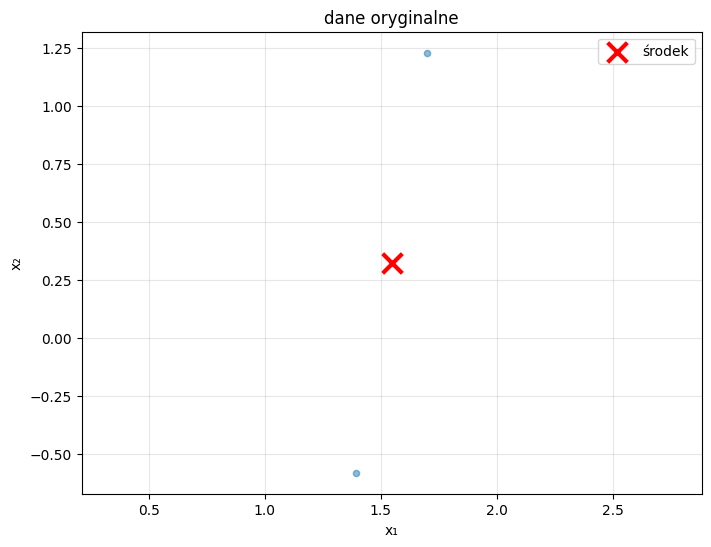

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=20)
plt.scatter(x_mean[0], x_mean[1], c='red', s=200, marker='x', linewidths=3, label='środek')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('dane oryginalne')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

## 9. Osie glowne

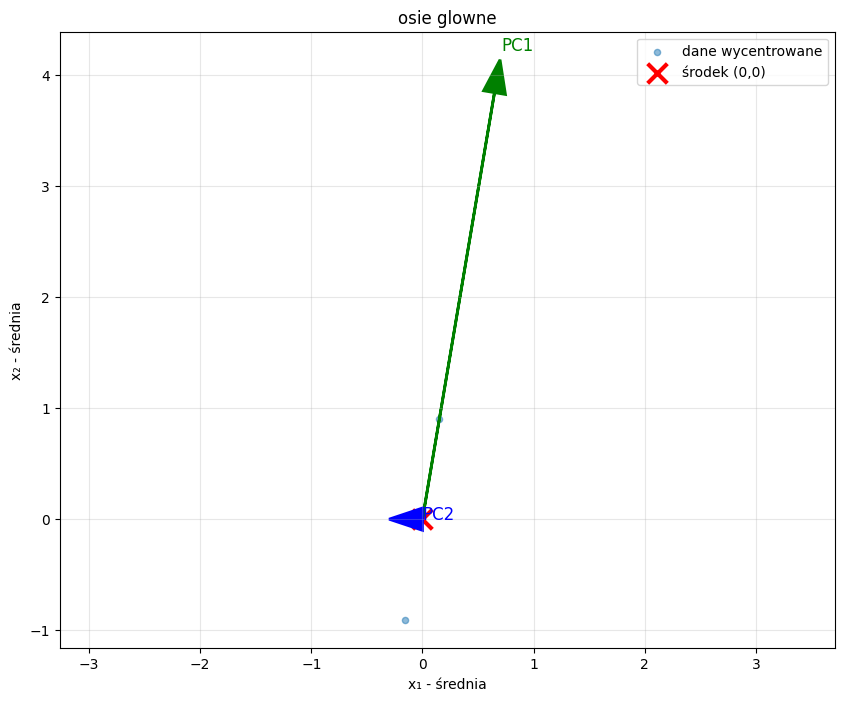

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(B[:, 0], B[:, 1], alpha=0.5, s=20, label='dane wycentrowane')
plt.scatter(0, 0, c='red', s=200, marker='x', linewidths=3, label='środek (0,0)')

# skala dla osi
scale = 3 * np.sqrt(eigenvalues)

# pierwsza os glowna
plt.arrow(0, 0, scale[0] * V[0, 0], scale[0] * V[1, 0], 
          head_width=0.2, head_length=0.3, fc='green', ec='green', linewidth=2)
plt.text(scale[0] * V[0, 0] * 1.1, scale[0] * V[1, 0] * 1.1, 'PC1', fontsize=12, color='green')

# druga os glowna
plt.arrow(0, 0, scale[1] * V[0, 1], scale[1] * V[1, 1], 
          head_width=0.2, head_length=0.3, fc='blue', ec='blue', linewidth=2)
plt.text(scale[1] * V[0, 1] * 1.1, scale[1] * V[1, 1] * 1.1, 'PC2', fontsize=12, color='blue')

plt.xlabel('x₁ - średnia')
plt.ylabel('x₂ - średnia')
plt.title('osie glowne')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

## 10. Dane po transformacji

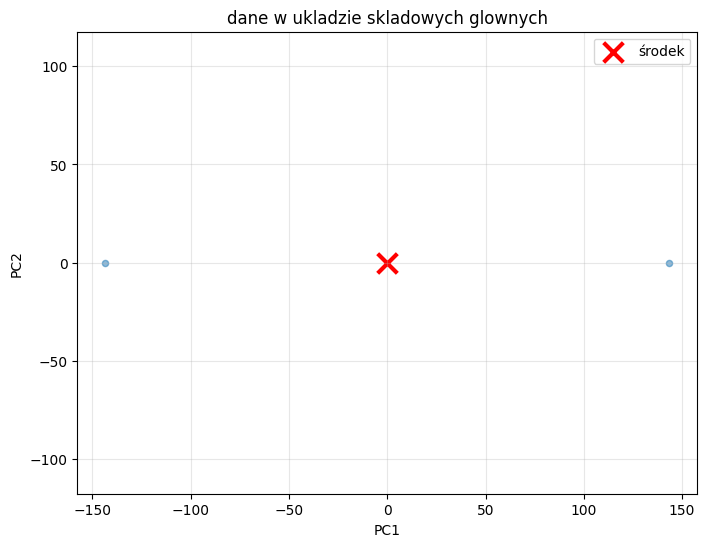

In [27]:
# dane w ukladzie PC
B_transformed = B @ V

plt.figure(figsize=(8, 6))
plt.scatter(B_transformed[:, 0], B_transformed[:, 1], alpha=0.5, s=20)
plt.scatter(0, 0, c='red', s=200, marker='x', linewidths=3, label='środek')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('dane w ukladzie skladowych glownych')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

## Wyniki

In [28]:
print("WYNIKI:")
print()
print("Srodek:")
print(f"  x1 = {x_mean[0]:.6f}")
print(f"  x2 = {x_mean[1]:.6f}")
print()
print("Osie glowne:")
print(f"  PC1 = [{V[0,0]:.6f}, {V[1,0]:.6f}]")
print(f"  PC2 = [{V[0,1]:.6f}, {V[1,1]:.6f}]")
print()
print("Wariancja:")
print(f"  lambda1 = {eigenvalues[0]:.6f} ({100*eigenvalues[0]/total_var:.2f}%)")
print(f"  lambda2 = {eigenvalues[1]:.6f} ({100*eigenvalues[1]/total_var:.2f}%)")
print()
print(f"Kat obrotu: {angle_rad:.6f} rad = {angle_deg:.2f}°")

WYNIKI:

Srodek:
  x1 = 1.545645
  x2 = 0.324414

Osie glowne:
  PC1 = [0.001065, 0.006307]
  PC2 = [-0.998768, -0.000045]

Wariancja:
  lambda1 = 41129.017721 (100.00%)
  lambda2 = 0.000000 (0.00%)

Kat obrotu: 1.403472 rad = 80.41°
